# Chicago Crime Data Analysis
# Presented by: 
* Vikram Pratap Singh

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import os
import joblib
from sklearn.preprocessing import OneHotEncoder

In [2]:
# Ensure the output directory exists
output_dir = 'output_data'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

In [3]:
# Read the CSV file
df = pd.read_csv(r'C:\Users\HP\Downloads\Crimes_-_2001_to_Present\Crimes_-_2001_to_Present.csv', encoding='latin1')

### View subset of data

In [4]:
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,5741943,HN549294,08/25/2007 09:22:18 AM,074XX N ROGERS AVE,0560,ASSAULT,SIMPLE,OTHER,False,False,...,49.0,1.0,08A,NaN,NaN,2007,08/17/2015 03:03:40 PM,NaN,NaN,NaN
1,25953,JE240540,05/24/2021 03:06:00 PM,020XX N LARAMIE AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,...,36.0,19.0,01A,1141387.0,1913179.0,2021,11/18/2023 03:39:49 PM,41.917838,-87.755969,"(41.917838056, -87.755968972)"
2,26038,JE279849,06/26/2021 09:24:00 AM,062XX N MC CORMICK RD,0110,HOMICIDE,FIRST DEGREE MURDER,PARKING LOT,True,False,...,50.0,13.0,01A,1152781.0,1941458.0,2021,11/18/2023 03:39:49 PM,41.995219,-87.713355,"(41.995219444, -87.713354912)"
3,13279676,JG507211,11/09/2023 07:30:00 AM,019XX W BYRON ST,0620,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False,...,47.0,5.0,05,1162518.0,1925906.0,2023,11/18/2023 03:39:49 PM,41.952345,-87.677975,"(41.952345086, -87.677975059)"
4,13274752,JG501049,11/12/2023 07:59:00 AM,086XX S COTTAGE GROVE AVE,0454,BATTERY,"AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...",SMALL RETAIL STORE,True,False,...,6.0,44.0,08B,1183071.0,1847869.0,2023,12/09/2023 03:41:24 PM,41.737751,-87.604856,"(41.737750767, -87.604855911)"


In [5]:
df.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [6]:
# Calculate the frequency of each crime type
crime_type_df = df['Primary Type'].value_counts(ascending=True)

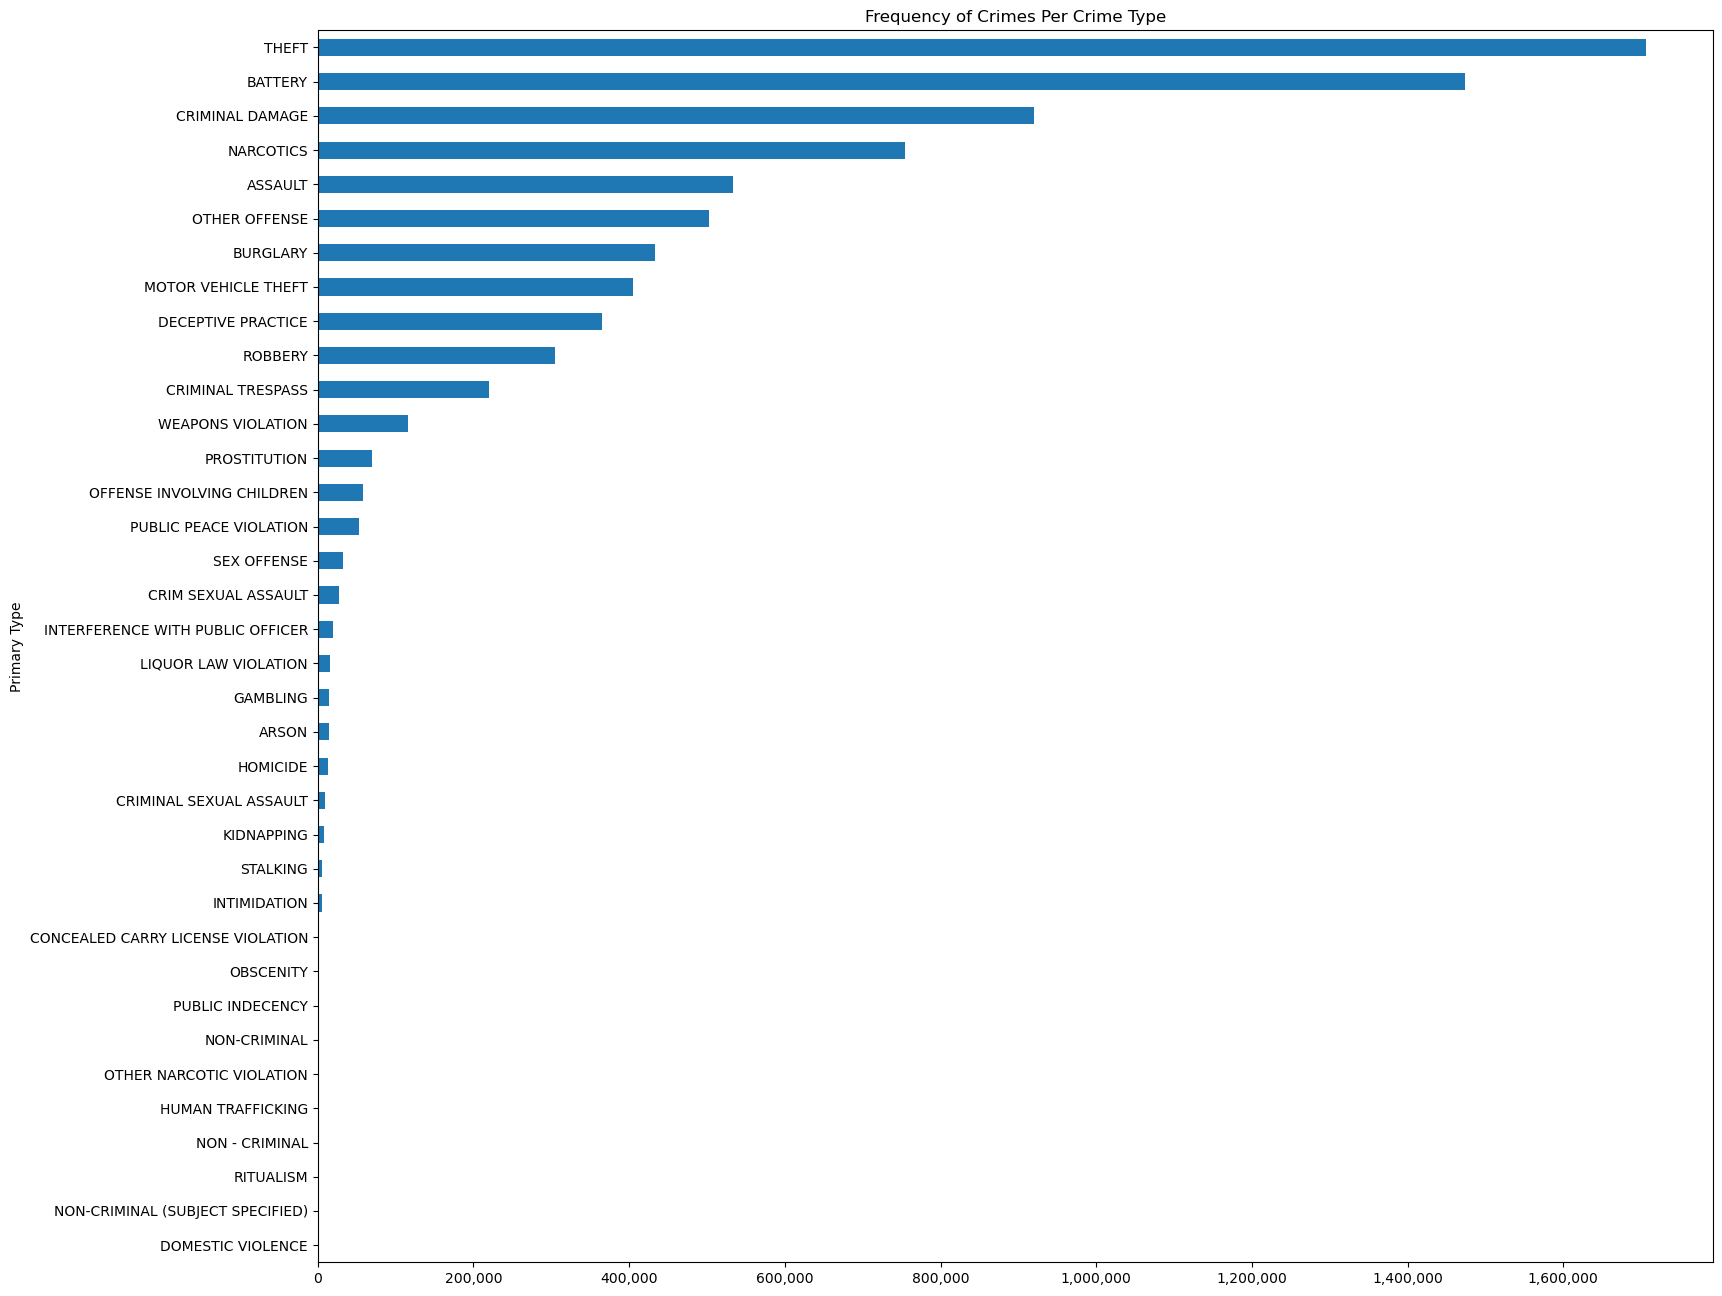

In [7]:
# Plot the data
fig = plt.figure(figsize=(18, 16))
plt.title("Frequency of Crimes Per Crime Type")
plt.xlabel("Frequency of Crimes")
plt.ylabel("Type of Crime")
ax = crime_type_df.plot(kind='barh')

# Format the x-axis labels to include commas
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# Save the plot
plt.savefig(os.path.join(output_dir, "TypeOFCrime.png"))

# Show the plot
plt.show()

### Processing Date and Time Information:

In [8]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.to_period('M')
df['Hour'] = df['Date'].dt.hour
df['Day'] = df['Date'].dt.to_period('D')

### Plotting Crimes Per Year:

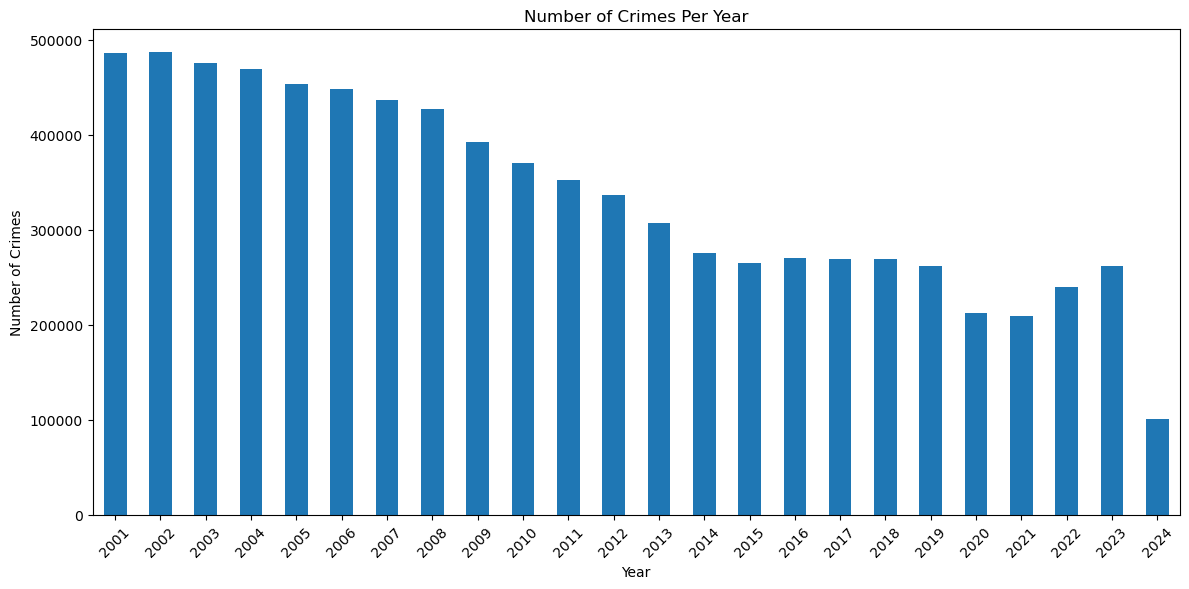

In [9]:
crimes_per_year = df['Year'].value_counts().sort_index()
fig, ax = plt.subplots(figsize=(12, 6))
crimes_per_year.plot(kind='bar', ax=ax)
ax.set_title('Number of Crimes Per Year')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'Crimes_Per_Year.png'))
plt.show()

### Plotting Crimes Per Month:

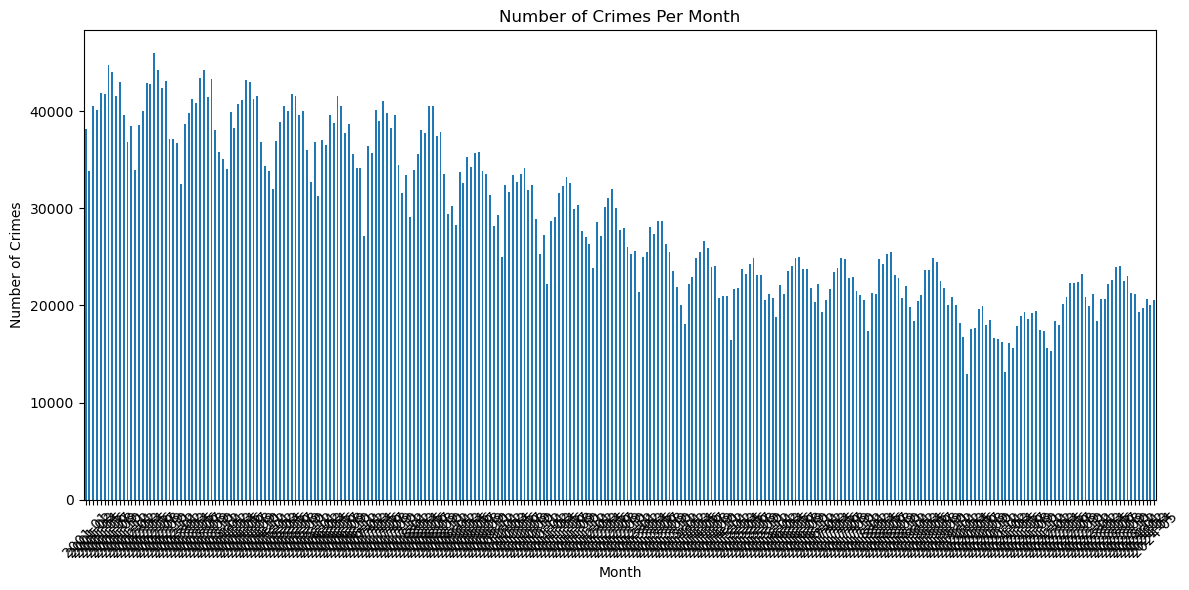

In [10]:
crimes_per_month = df['Month'].value_counts().sort_index()
fig, ax = plt.subplots(figsize=(12, 6))
crimes_per_month.plot(kind='bar', ax=ax)
ax.set_title('Number of Crimes Per Month')
ax.set_xlabel('Month')
ax.set_ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'Crimes_Per_Month.png'))
plt.show()

### Plotting Crimes Per Day:

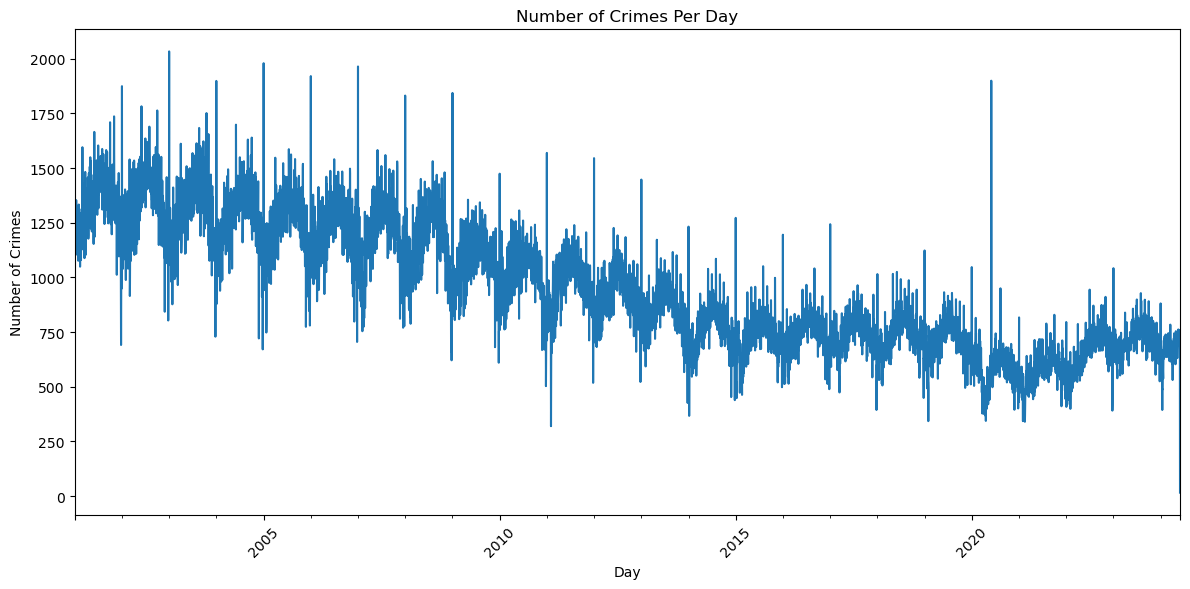

In [11]:
crimes_per_day = df['Day'].value_counts().sort_index()
fig, ax = plt.subplots(figsize=(12, 6))
crimes_per_day.plot(kind='line', ax=ax)
ax.set_title('Number of Crimes Per Day')
ax.set_xlabel('Day')
ax.set_ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'Crimes_Per_Day.png'))
plt.show()

### Determining Peak Crime Hours

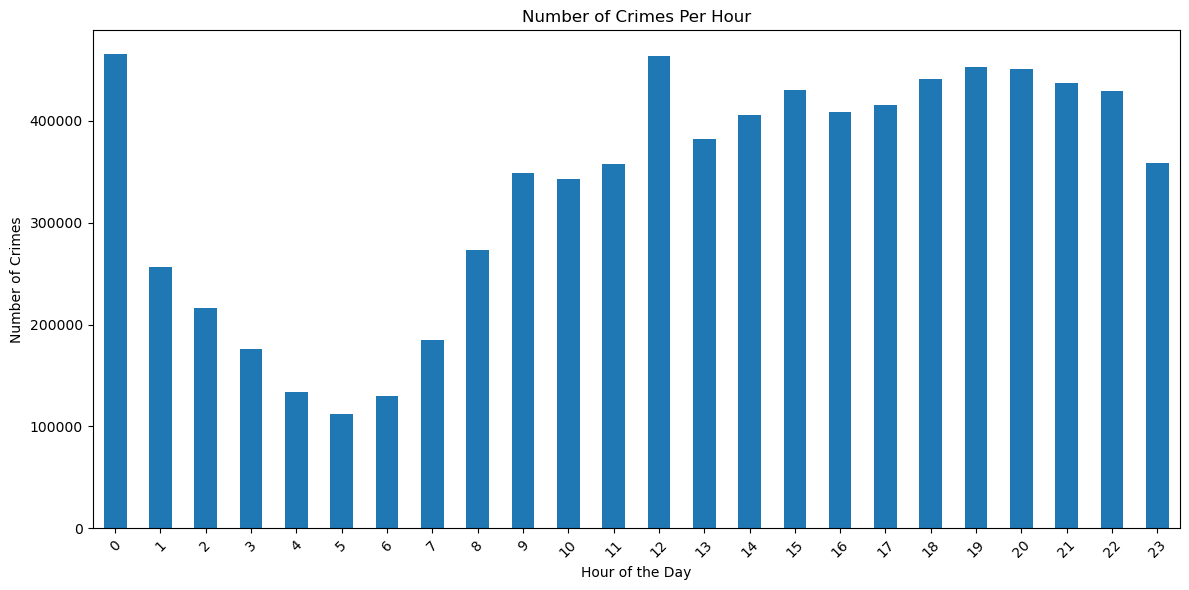

In [12]:
crimes_per_hour = df['Hour'].value_counts().sort_index()
fig, ax = plt.subplots(figsize=(12, 6))
crimes_per_hour.plot(kind='bar', ax=ax)
ax.set_title('Number of Crimes Per Hour')
ax.set_xlabel('Hour of the Day')
ax.set_ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'Crimes_Per_Hour.png'))
plt.show()

### Analyze and plot crime rates across different districts

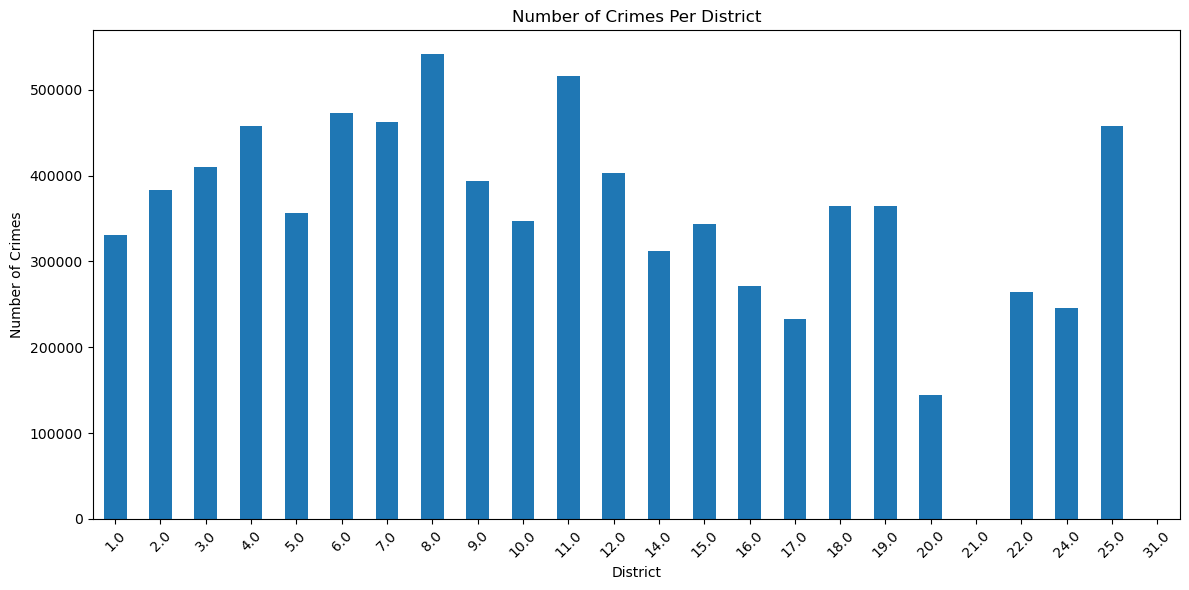

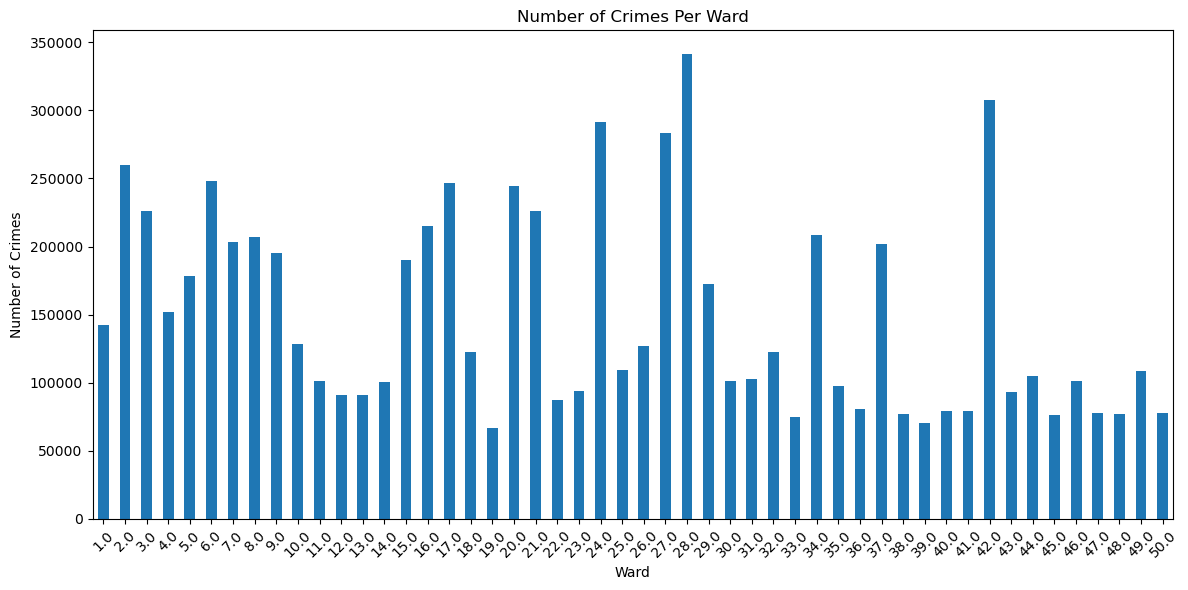

In [14]:
# Count the number of crimes per district/ward
crimes_per_district = df['District'].value_counts().sort_index()
crimes_per_ward = df['Ward'].value_counts().sort_index()

# Plot the number of crimes per district
fig, ax = plt.subplots(figsize=(12, 6))
crimes_per_district.plot(kind='bar', ax=ax)
ax.set_title('Number of Crimes Per District')
ax.set_xlabel('District')
ax.set_ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'Crimes_Per_District.png'))
plt.show()

# Plot the number of crimes per ward
fig, ax = plt.subplots(figsize=(12, 6))
crimes_per_ward.plot(kind='bar', ax=ax)
ax.set_title('Number of Crimes Per Ward')
ax.set_xlabel('Ward')
ax.set_ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'Crimes_Per_Ward.png'))
plt.show()

### Analyze the frequency of different 'Primary Type' and 'Description' fields

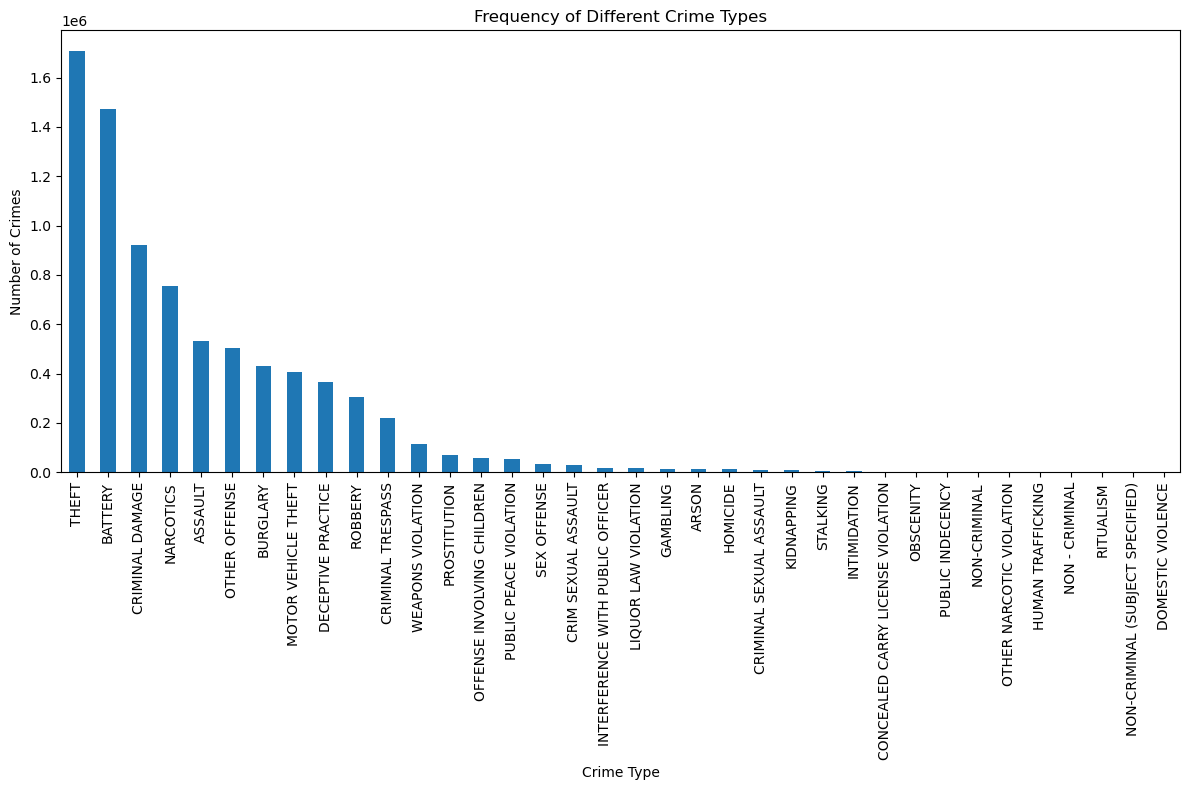

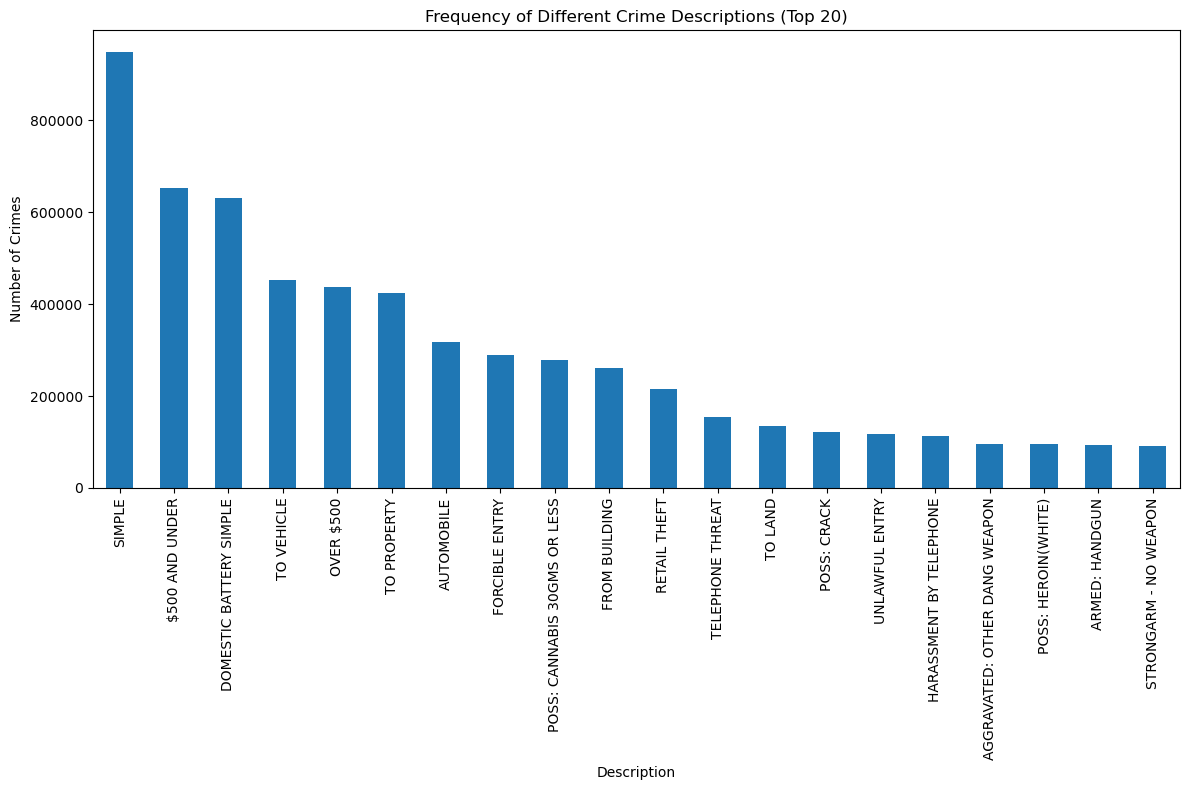

In [15]:
# Frequency of different 'Primary Type' fields
primary_type_counts = df['Primary Type'].value_counts()

# Plot the frequency of different 'Primary Type' fields
fig, ax = plt.subplots(figsize=(12, 8))
primary_type_counts.plot(kind='bar', ax=ax)
ax.set_title('Frequency of Different Crime Types')
ax.set_xlabel('Crime Type')
ax.set_ylabel('Number of Crimes')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'Crime_Type_Distribution.png'))
plt.show()

# Frequency of different 'Description' fields
description_counts = df['Description'].value_counts().head(20)  # Display top 20 descriptions

# Plot the frequency of different 'Description' fields
fig, ax = plt.subplots(figsize=(12, 8))
description_counts.plot(kind='bar', ax=ax)
ax.set_title('Frequency of Different Crime Descriptions (Top 20)')
ax.set_xlabel('Description')
ax.set_ylabel('Number of Crimes')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'Crime_Description_Distribution.png'))
plt.show()


###  Investigate the distribution of severe crimes versus less severe crimes

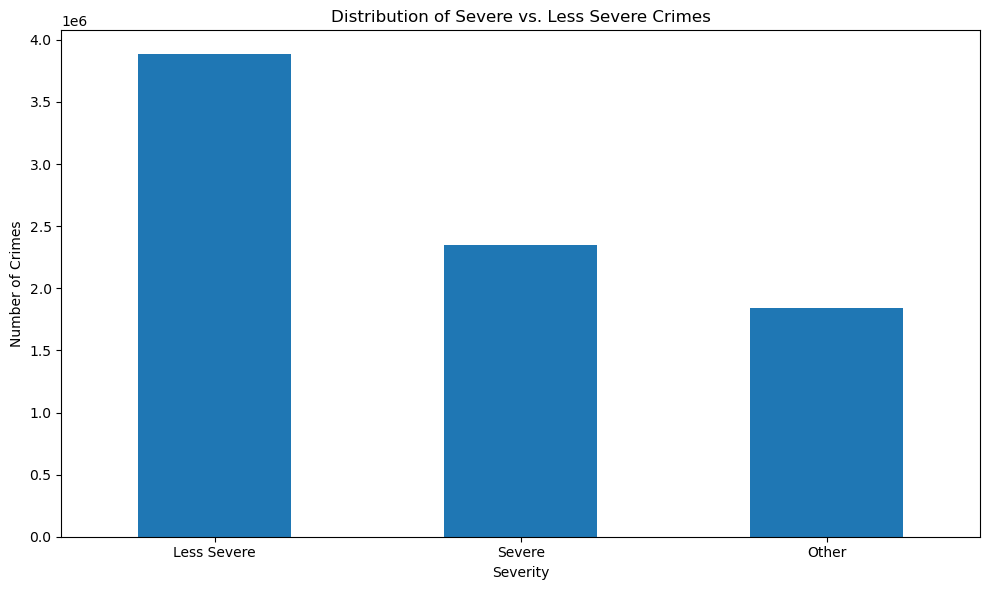

In [16]:
# Define severe and less severe crime types
severe_crimes = ['HOMICIDE', 'ASSAULT', 'BATTERY', 'ROBBERY', 'CRIM SEXUAL ASSAULT']
less_severe_crimes = ['THEFT', 'FRAUD', 'CRIMINAL DAMAGE', 'NARCOTICS', 'OTHER OFFENSE']

# Filter severe and less severe crimes
df['Severity'] = df['Primary Type'].apply(lambda x: 'Severe' if x in severe_crimes else ('Less Severe' if x in less_severe_crimes else 'Other'))

# Count the number of severe and less severe crimes
severity_counts = df['Severity'].value_counts()

# Plot the distribution of severe and less severe crimes
fig, ax = plt.subplots(figsize=(10, 6))
severity_counts.plot(kind='bar', ax=ax)
ax.set_title('Distribution of Severe vs. Less Severe Crimes')
ax.set_xlabel('Severity')
ax.set_ylabel('Number of Crimes')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'Crime_Severity_Distribution.png'))
plt.show()

### Calculate the percentage of crimes that result in an arrest

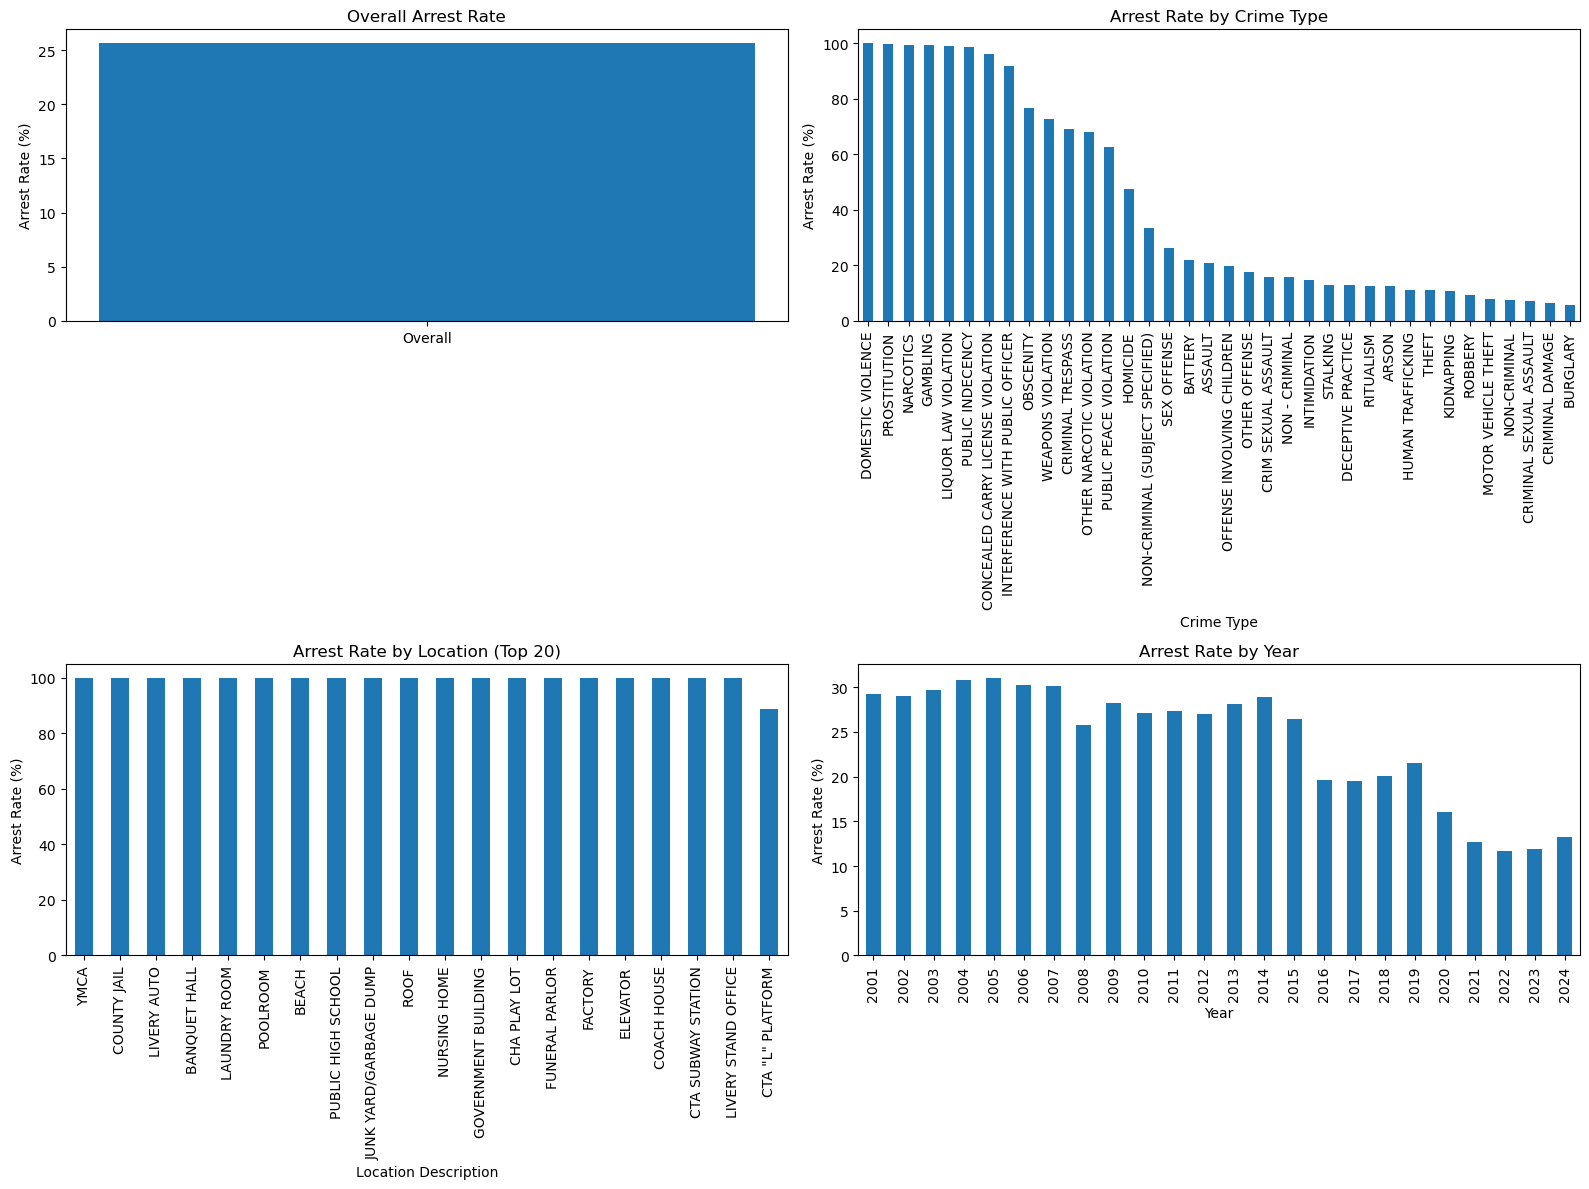

In [17]:
# Calculate overall arrest rate
total_crimes = len(df)
total_arrests = df['Arrest'].sum()
arrest_rate_overall = (total_arrests / total_crimes) * 100

# Calculate arrest rate by crime type
arrest_rate_by_type = df.groupby('Primary Type')['Arrest'].mean() * 100

# Calculate arrest rate by location
arrest_rate_by_location = df.groupby('Location Description')['Arrest'].mean() * 100

# Calculate arrest rate by year
arrest_rate_by_year = df.groupby('Year')['Arrest'].mean() * 100

# Plot the arrest rates
fig, ax = plt.subplots(2, 2, figsize=(16, 12))

# Overall arrest rate
ax[0, 0].bar(['Overall'], [arrest_rate_overall])
ax[0, 0].set_title('Overall Arrest Rate')
ax[0, 0].set_ylabel('Arrest Rate (%)')

# Arrest rate by crime type
arrest_rate_by_type.sort_values(ascending=False).plot(kind='bar', ax=ax[0, 1])
ax[0, 1].set_title('Arrest Rate by Crime Type')
ax[0, 1].set_xlabel('Crime Type')
ax[0, 1].set_ylabel('Arrest Rate (%)')

# Arrest rate by location
top_20_locations = arrest_rate_by_location.sort_values(ascending=False).head(20)
top_20_locations.plot(kind='bar', ax=ax[1, 0])
ax[1, 0].set_title('Arrest Rate by Location (Top 20)')
ax[1, 0].set_xlabel('Location Description')
ax[1, 0].set_ylabel('Arrest Rate (%)')

# Arrest rate by year
arrest_rate_by_year.plot(kind='bar', ax=ax[1, 1])
ax[1, 1].set_title('Arrest Rate by Year')
ax[1, 1].set_xlabel('Year')
ax[1, 1].set_ylabel('Arrest Rate (%)')

plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'Arrest_Rates.png'))
plt.show()

### Compare domestic versus non-domestic crimes

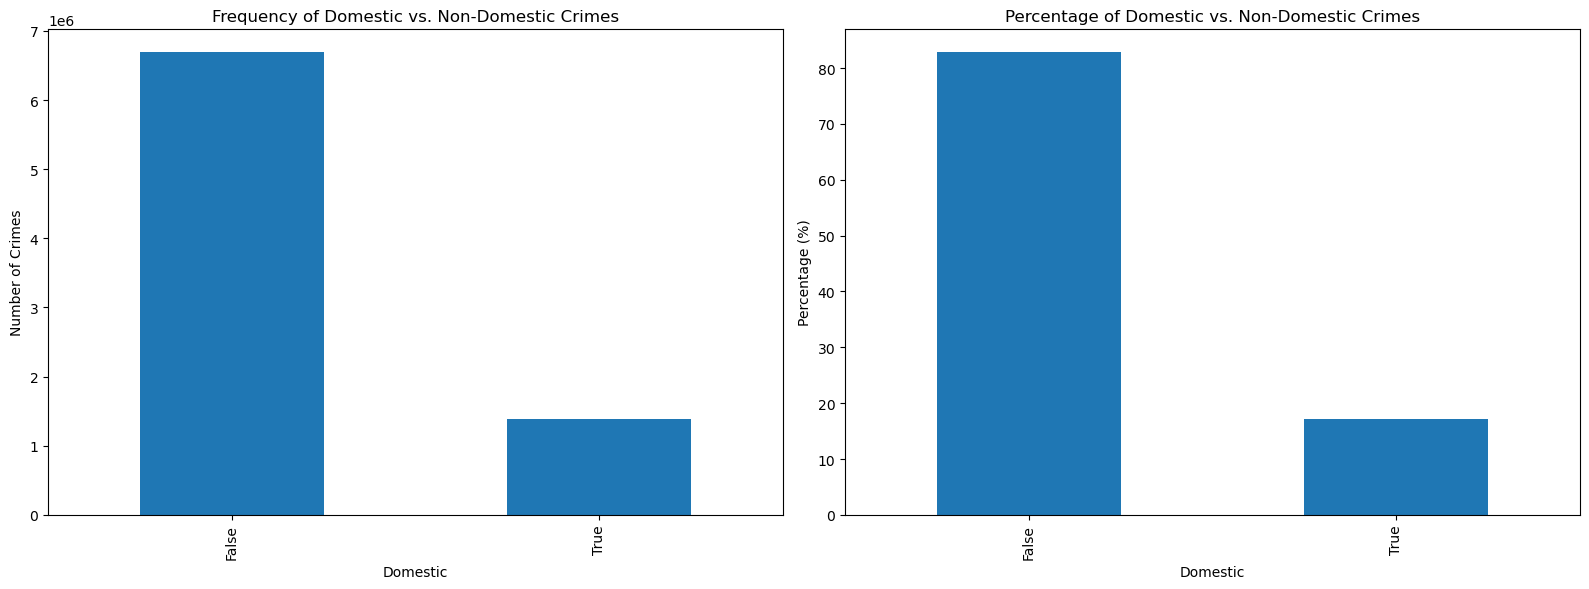

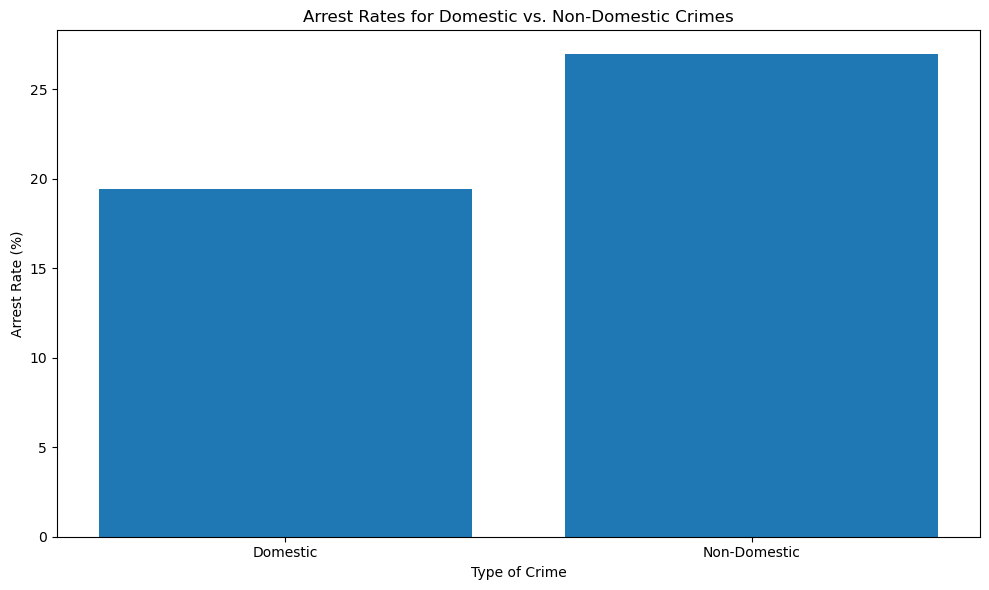

In [18]:
# Calculate the number of domestic vs. non-domestic crimes
domestic_counts = df['Domestic'].value_counts()

# Calculate the percentage of domestic vs. non-domestic crimes
domestic_percentage = (domestic_counts / total_crimes) * 100

# Compare the frequency of domestic vs. non-domestic crimes
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Frequency of domestic vs. non-domestic crimes
domestic_counts.plot(kind='bar', ax=ax[0])
ax[0].set_title('Frequency of Domestic vs. Non-Domestic Crimes')
ax[0].set_xlabel('Domestic')
ax[0].set_ylabel('Number of Crimes')

# Percentage of domestic vs. non-domestic crimes
domestic_percentage.plot(kind='bar', ax=ax[1])
ax[1].set_title('Percentage of Domestic vs. Non-Domestic Crimes')
ax[1].set_xlabel('Domestic')
ax[1].set_ylabel('Percentage (%)')

plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'Domestic_vs_NonDomestic_Crimes.png'))
plt.show()

# Compare characteristics (e.g., arrest rates) of domestic vs. non-domestic crimes
arrest_rate_domestic = df[df['Domestic'] == True]['Arrest'].mean() * 100
arrest_rate_non_domestic = df[df['Domestic'] == False]['Arrest'].mean() * 100

# Plot the arrest rates for domestic vs. non-domestic crimes
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(['Domestic', 'Non-Domestic'], [arrest_rate_domestic, arrest_rate_non_domestic])
ax.set_title('Arrest Rates for Domestic vs. Non-Domestic Crimes')
ax.set_xlabel('Type of Crime')
ax.set_ylabel('Arrest Rate (%)')

plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'Arrest_Rates_Domestic_vs_NonDomestic.png'))
plt.show()

### Investigate the most common locations for crimes

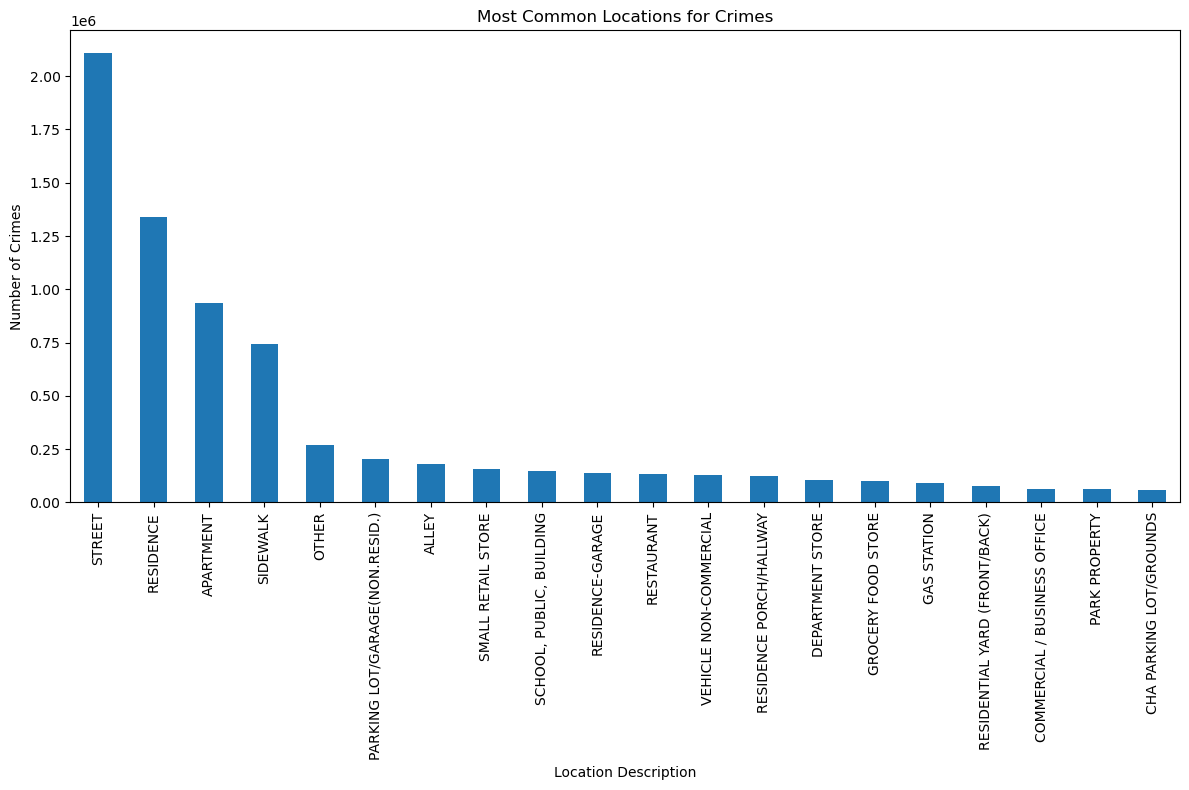

In [19]:
# Frequency of crimes by location description
location_counts = df['Location Description'].value_counts().head(20)

# Plot the most common locations for crimes
fig, ax = plt.subplots(figsize=(12, 8))
location_counts.plot(kind='bar', ax=ax)
ax.set_title('Most Common Locations for Crimes')
ax.set_xlabel('Location Description')
ax.set_ylabel('Number of Crimes')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'Common_Crime_Locations.png'))
plt.show()

### Analyze how crime types vary by location

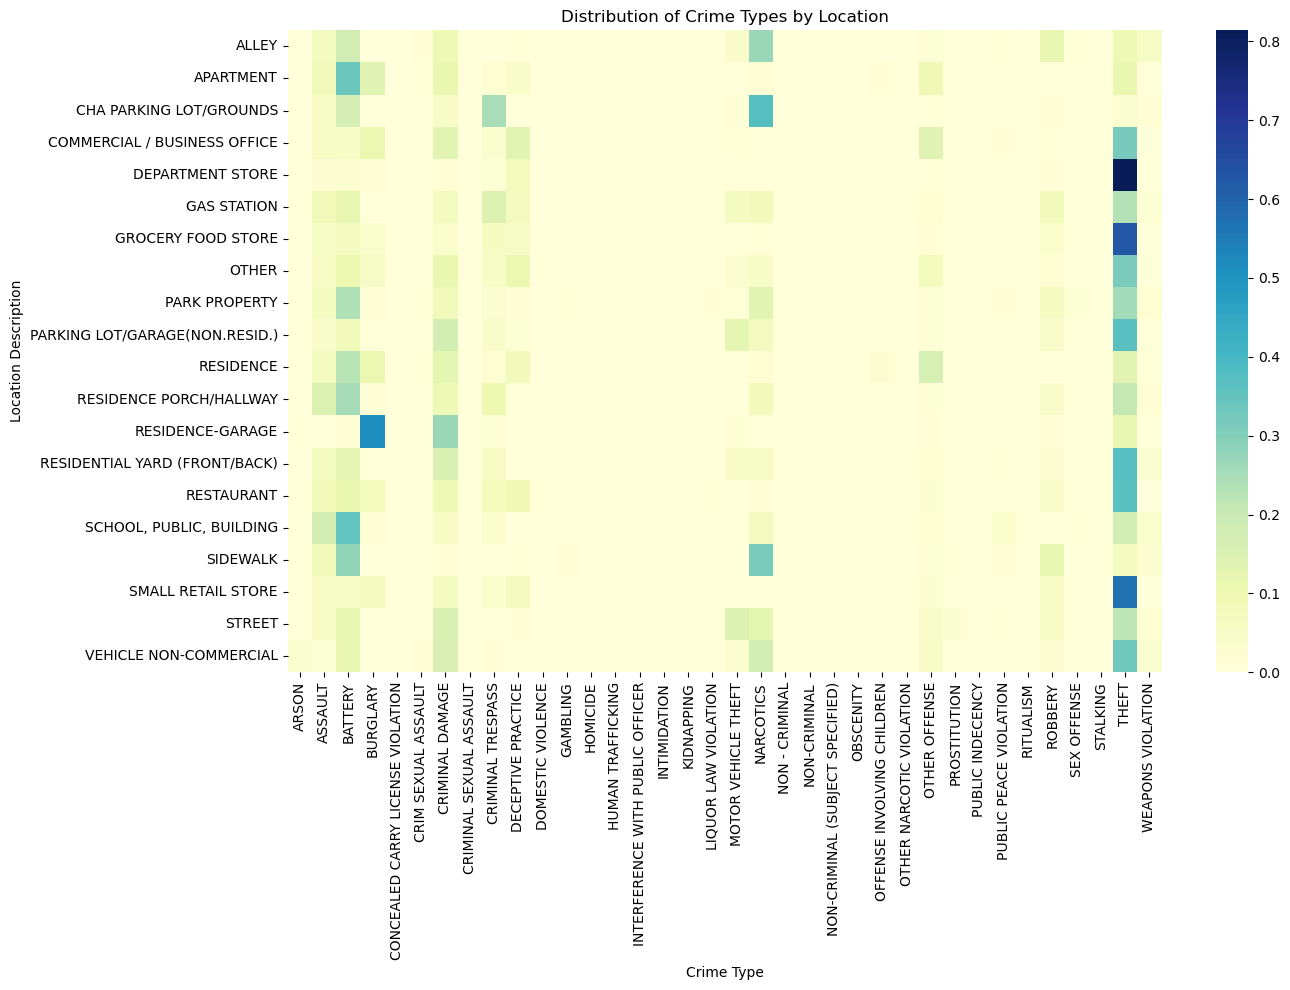

In [20]:
# Top 10 locations
location_counts = df['Location Description'].value_counts().head(20)
top_locations = location_counts.index

# Filter data for top locations
df_top_locations = df[df['Location Description'].isin(top_locations)]

# Create a pivot table to show the distribution of crime types by location
location_crime_pivot = df_top_locations.pivot_table(index='Location Description', columns='Primary Type', aggfunc='size', fill_value=0)

# Normalize by location to get percentages
location_crime_pivot_norm = location_crime_pivot.div(location_crime_pivot.sum(axis=1), axis=0)

# Plot the distribution of crime types by location
fig, ax = plt.subplots(figsize=(14, 10))
sns.heatmap(location_crime_pivot_norm, cmap="YlGnBu", ax=ax)
ax.set_title('Distribution of Crime Types by Location')
ax.set_xlabel('Crime Type')
ax.set_ylabel('Location Description')
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'Crime_Types_By_Location.png'))
plt.show()

### Analyze crime data by beat and community area

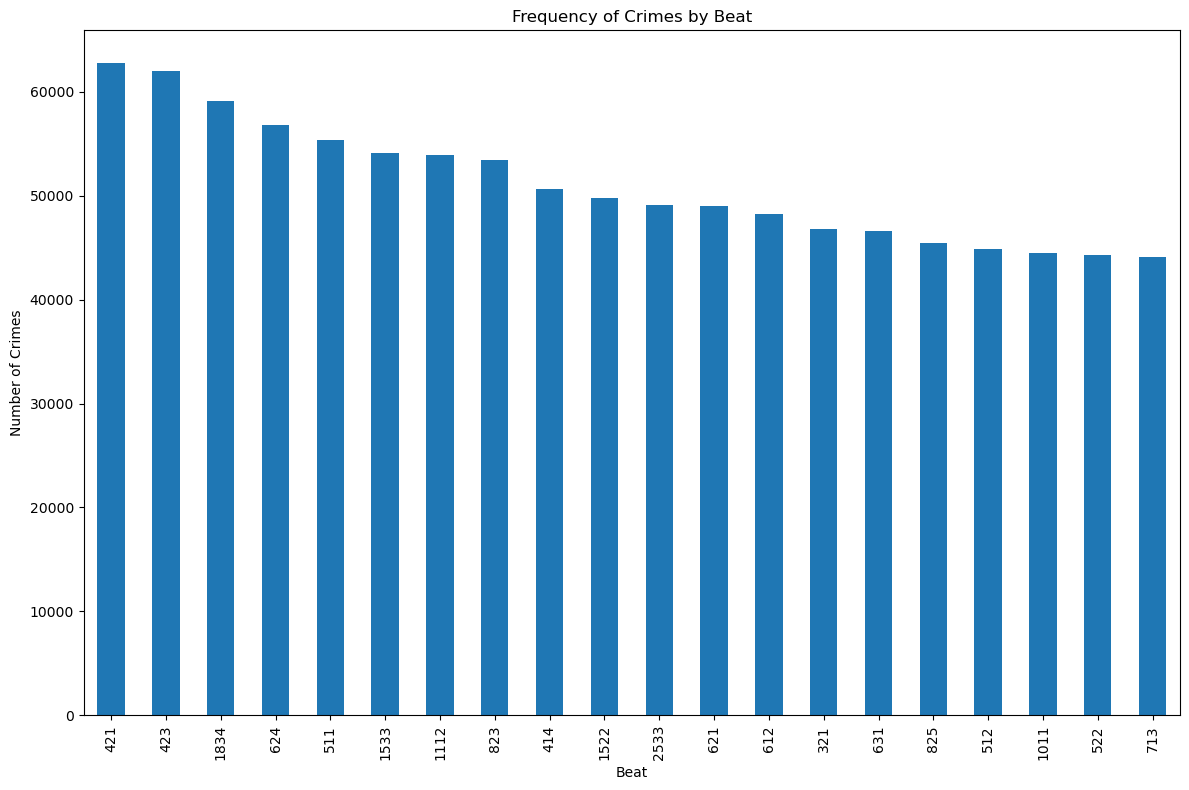

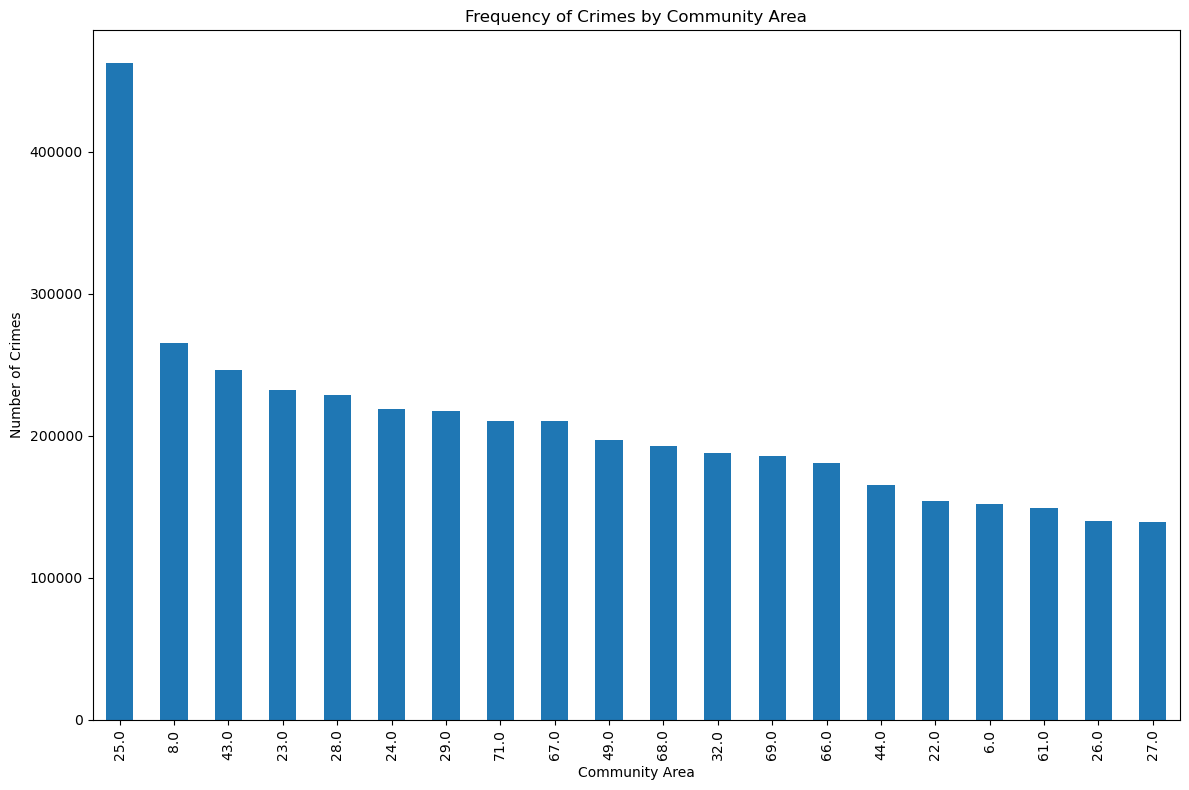

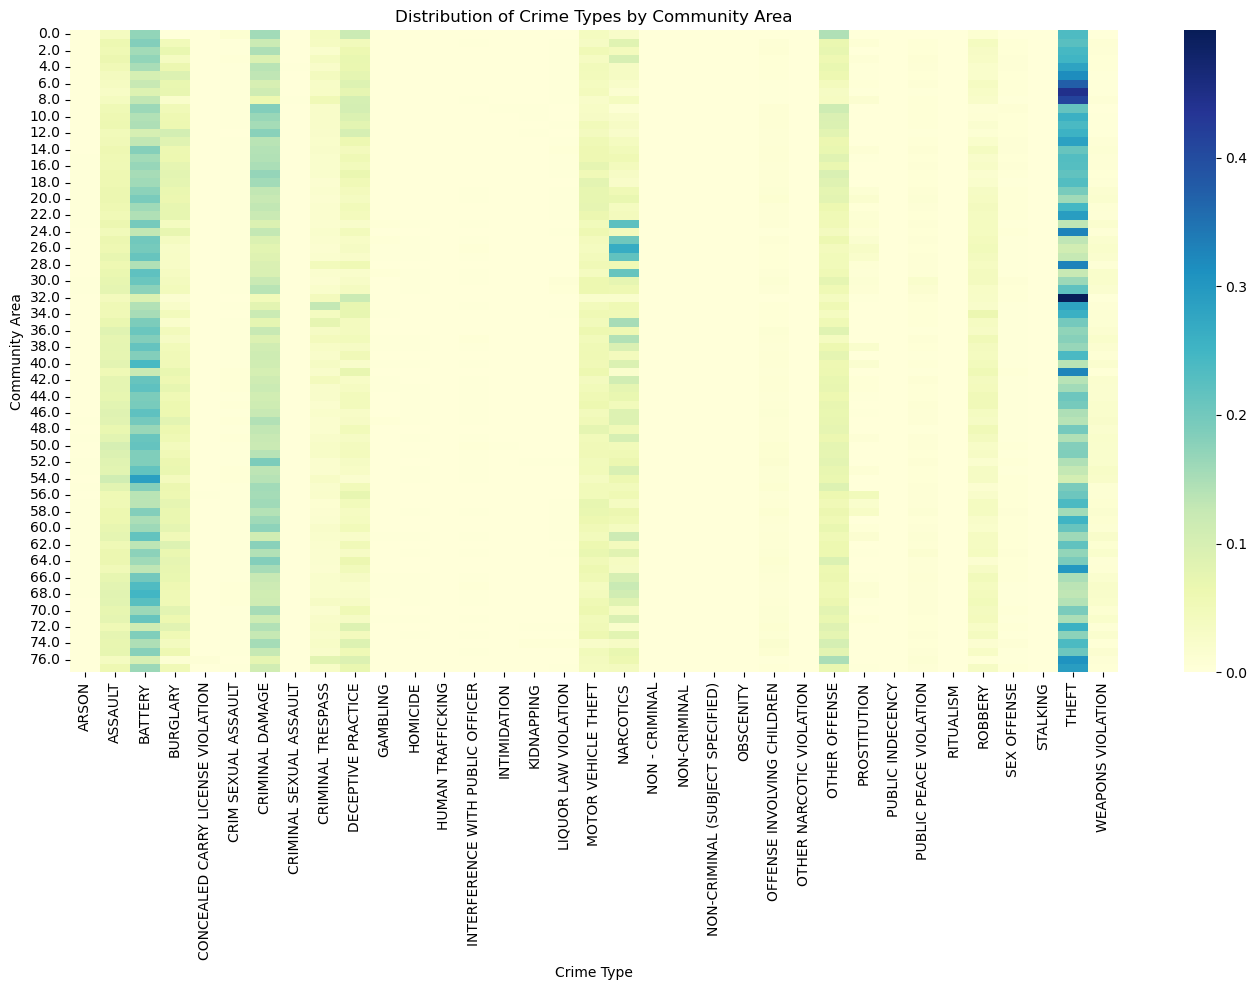

In [21]:
# Frequency of crimes by beat
beat_counts = df['Beat'].value_counts().head(20)

# Plot the frequency of crimes by beat
fig, ax = plt.subplots(figsize=(12, 8))
beat_counts.plot(kind='bar', ax=ax)
ax.set_title('Frequency of Crimes by Beat')
ax.set_xlabel('Beat')
ax.set_ylabel('Number of Crimes')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'Crimes_By_Beat.png'))
plt.show()

# Frequency of crimes by community area
community_area_counts = df['Community Area'].value_counts().head(20)

# Plot the frequency of crimes by community area
fig, ax = plt.subplots(figsize=(12, 8))
community_area_counts.plot(kind='bar', ax=ax)
ax.set_title('Frequency of Crimes by Community Area')
ax.set_xlabel('Community Area')
ax.set_ylabel('Number of Crimes')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'Crimes_By_Community_Area.png'))
plt.show()

# Analyzing the crime type distribution by community area
# Create a pivot table to show the distribution of crime types by community area
community_crime_pivot = df.pivot_table(index='Community Area', columns='Primary Type', aggfunc='size', fill_value=0)

# Normalize by community area to get percentages
community_crime_pivot_norm = community_crime_pivot.div(community_crime_pivot.sum(axis=1), axis=0)

# Plot the distribution of crime types by community area
fig, ax = plt.subplots(figsize=(14, 10))
sns.heatmap(community_crime_pivot_norm, cmap="YlGnBu", ax=ax)
ax.set_title('Distribution of Crime Types by Community Area')
ax.set_xlabel('Crime Type')
ax.set_ylabel('Community Area')
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'Crime_Types_By_Community_Area.png'))
plt.show()

# Seasonal and Weather Impact
### Extract relevant date and time information


In [27]:
# Convert the 'Date' column to datetime format if not already done
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Define seasons based on months
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'

# Create a new 'Season' column
df['Season'] = df['Date'].dt.month.apply(get_season)

# Group by 'Season' and 'Primary Type' to count occurrences
seasonal_crime_counts = df.groupby(['Season', 'Primary Type']).size().unstack().fillna(0)

# Normalize by the total number of crimes per season to get relative frequencies
seasonal_crime_freq = seasonal_crime_counts.div(seasonal_crime_counts.sum(axis=1), axis=0)


### Plot the results

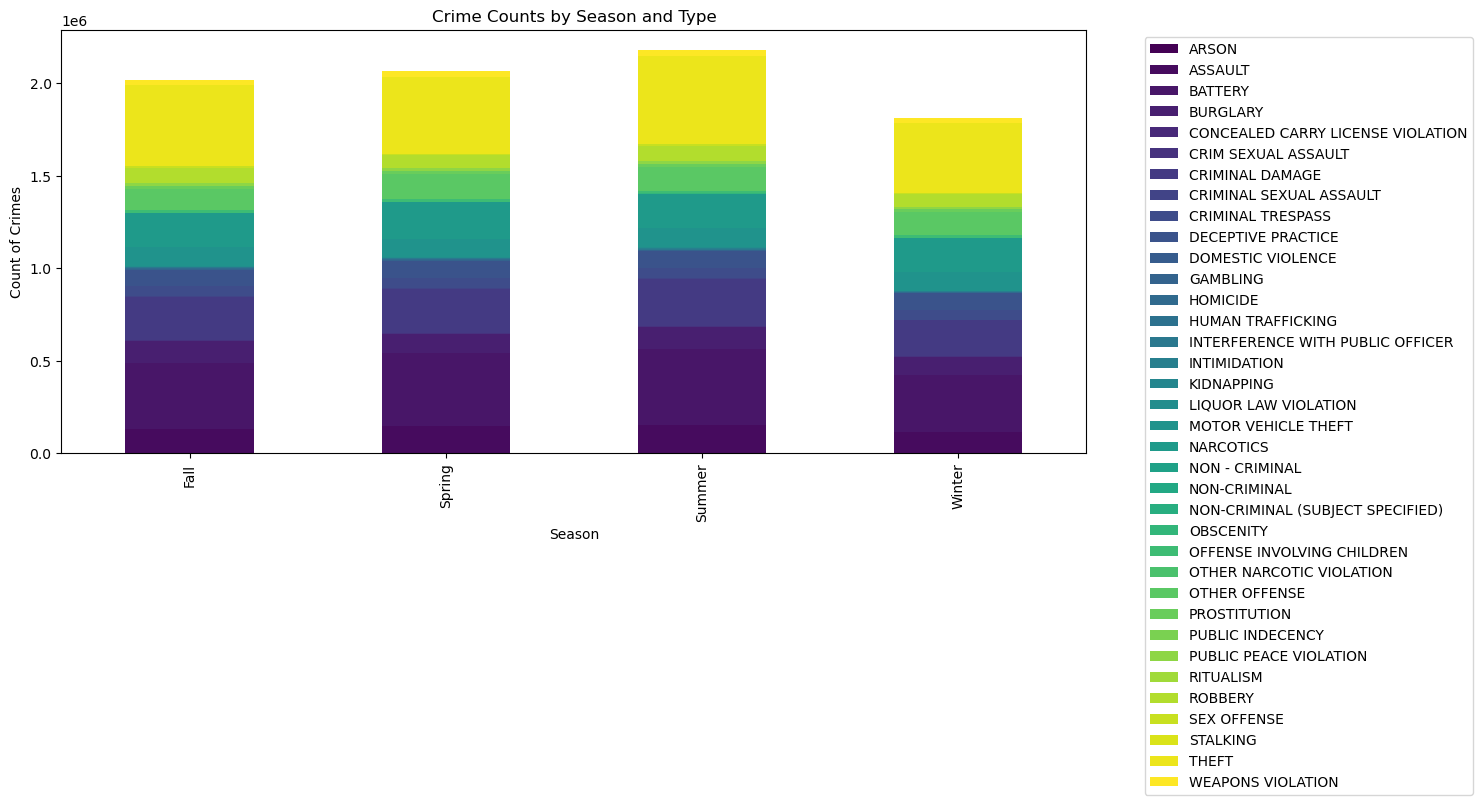

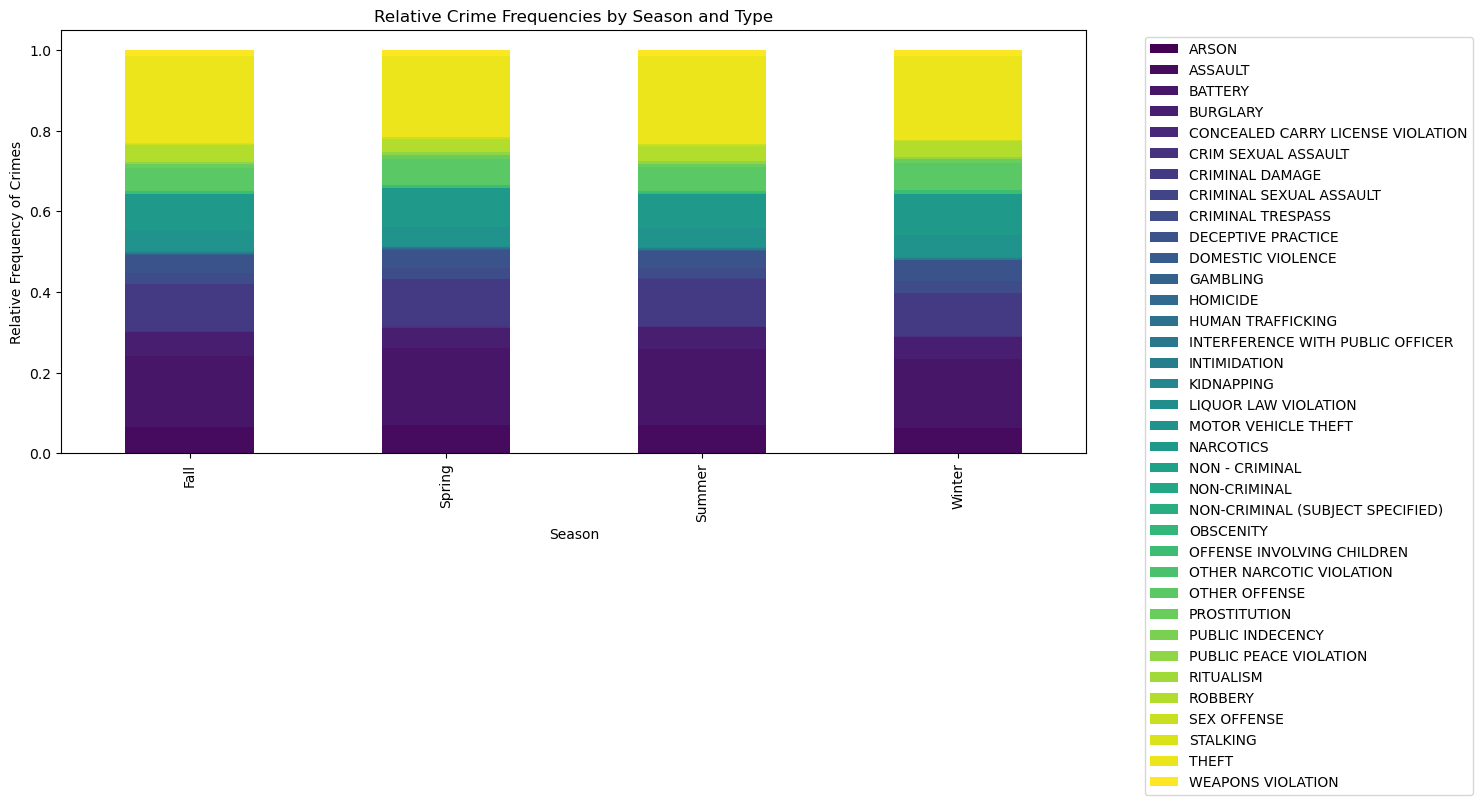

In [28]:
# Plotting the seasonal trends
seasonal_crime_counts.plot(kind='bar', stacked=True, figsize=(15, 7), colormap='viridis')
plt.title('Crime Counts by Season and Type')
plt.xlabel('Season')
plt.ylabel('Count of Crimes')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Plotting the relative frequencies
seasonal_crime_freq.plot(kind='bar', stacked=True, figsize=(15, 7), colormap='viridis')
plt.title('Relative Crime Frequencies by Season and Type')
plt.xlabel('Season')
plt.ylabel('Relative Frequency of Crimes')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Identify the locations that are repeatedly associated with criminala activity

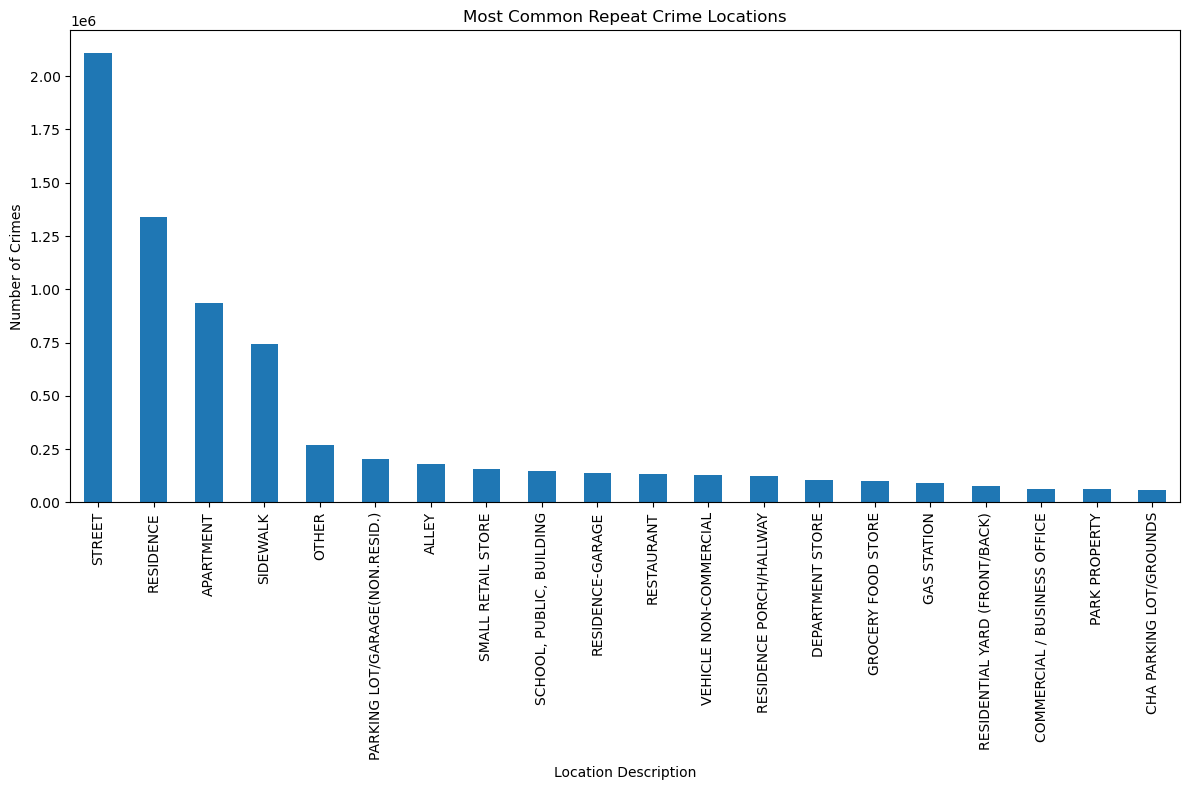

In [29]:
# Identify locations with repeated criminal activity
repeat_locations = df['Location Description'].value_counts().head(20)
# Plot the most common repeat crime locations
fig, ax = plt.subplots(figsize=(12, 8))
repeat_locations.plot(kind='bar', ax=ax)
ax.set_title('Most Common Repeat Crime Locations')
ax.set_xlabel('Location Description')
ax.set_ylabel('Number of Crimes')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'Repeat_Crime_Locations.png'))
plt.show()

###  Analyze recidivism rates

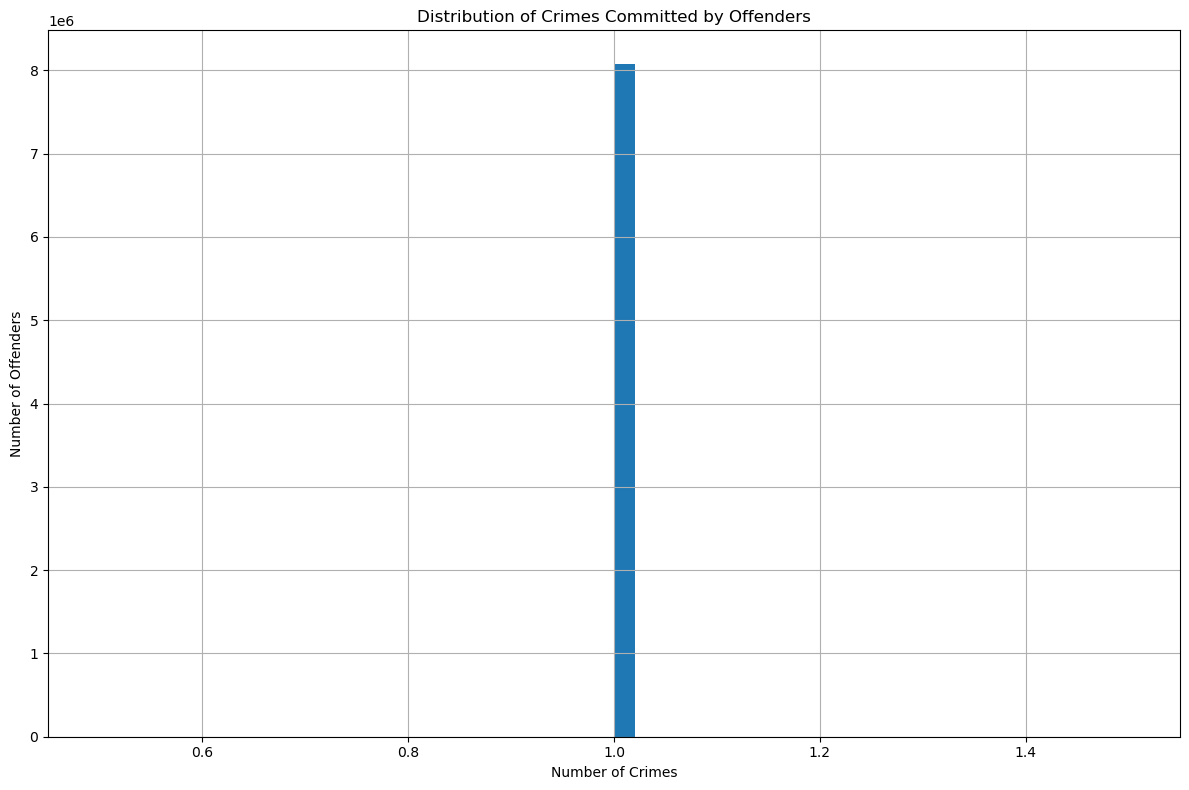

In [30]:
# Check if 'Offender ID' column is available
if 'ID' in df.columns:
    # Calculate the number of crimes committed by each offender
    recidivism_counts = df['ID'].value_counts()
    
    # Define a recidivist as someone who has committed more than one crime
    recidivist_counts = recidivism_counts[recidivism_counts > 1]
    
    # Calculate the recidivism rate
    recidivism_rate = len(recidivist_counts) / len(recidivism_counts)
    
    # Plot the distribution of crimes committed by offenders
    fig, ax = plt.subplots(figsize=(12, 8))
    recidivism_counts.hist(bins=50, ax=ax)
    ax.set_title('Distribution of Crimes Committed by Offenders')
    ax.set_xlabel('Number of Crimes')
    ax.set_ylabel('Number of Offenders')
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, 'Recidivism_Distribution.png'))
    plt.show()
else:
    print("No 'ID' column found in the dataset. Recidivism analysis cannot be performed.")

### Predictive modelling and risk assessment

### Data Preprocessing

In [31]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [32]:
# Extract relevant date features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Hour'] = df['Date'].dt.hour
df['DayOfWeek'] = df['Date'].dt.dayofweek

In [33]:
# Handle missing values by filling with 'Unknown' for categorical and 0 for numerical features
df.fillna({'Location Description': 'Unknown', 'Latitude': 0, 'Longitude': 0}, inplace=True)

In [40]:
# Optimize data types
df['Year'] = df['Year'].astype('int16')
df['Month'] = df['Month'].astype('int8')
df['Day'] = df['Day'].astype('int8')
df['Hour'] = df['Hour'].astype('int8')
df['DayOfWeek'] = df['DayOfWeek'].astype('int8')
df['Latitude'] = df['Latitude'].astype('float32')
df['Longitude'] = df['Longitude'].astype('float32')

In [41]:
# Encode categorical features
df_encoded = pd.get_dummies(df, columns=['Primary Type', 'Location Description'], drop_first=True)

### Feature Engineering

In [42]:
# Select features for the model
date_features = ['Year', 'Month', 'Day', 'Hour', 'DayOfWeek']
location_features = ['Latitude', 'Longitude']
categorical_features = [col for col in df_encoded.columns if col.startswith('Primary Type') or col.startswith('Location Description')]

In [43]:
# Combine all features
features = date_features + location_features + categorical_features

In [44]:
# Prepare the feature matrix and target vector
X = df_encoded[features]
y = df_encoded['Arrest']

In [45]:
# Reduce data size by sampling (e.g., 10% of the original data)
X_sampled, _, y_sampled, _ = train_test_split(X, y, train_size=0.1, random_state=42)

In [46]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=0.3, random_state=42)

###  Model Development

In [47]:
# Train a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [48]:
# Make predictions
y_pred = clf.predict(X_test)

In [49]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8808740688772878
              precision    recall  f1-score   support

       False       0.88      0.98      0.92    180036
        True       0.90      0.61      0.72     62279

    accuracy                           0.88    242315
   macro avg       0.89      0.79      0.82    242315
weighted avg       0.88      0.88      0.87    242315



In [ ]:
# Save the model for future use
output_dir = 'path_to_output_directory'  # Define your output directory
joblib.dump(clf, os.path.join(output_dir, 'crime_prediction_model.pkl'))